In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv('../../../data/kc_house_data.csv')

Drop ID
change date to look at seasons
look to see if beds and baths are more predictive multiplied together vs seperate
scale continous features

baseline
all cont
all cat
both

pull down look at nbdime

7,8,9

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.loc[df['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [7]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [8]:
first6_df = df.iloc[:,:7]

In [9]:
first6_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080
...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388


In [10]:
first6_df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000


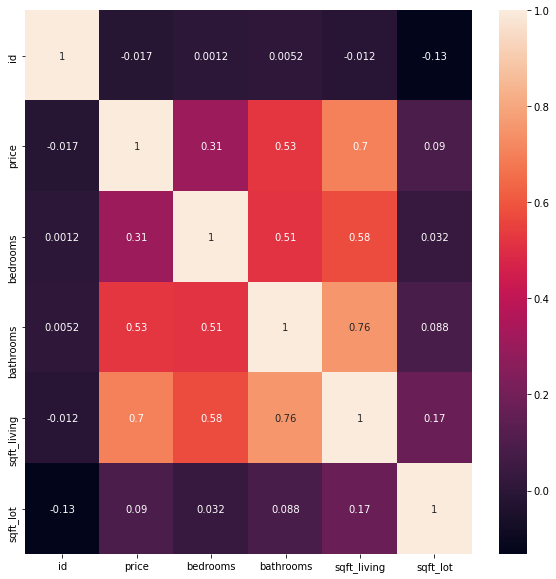

In [11]:
plt.figure(figsize=(10,10))

ax = sns.heatmap(first6_df.corr(), annot=True);

<AxesSubplot:xlabel='price', ylabel='price'>

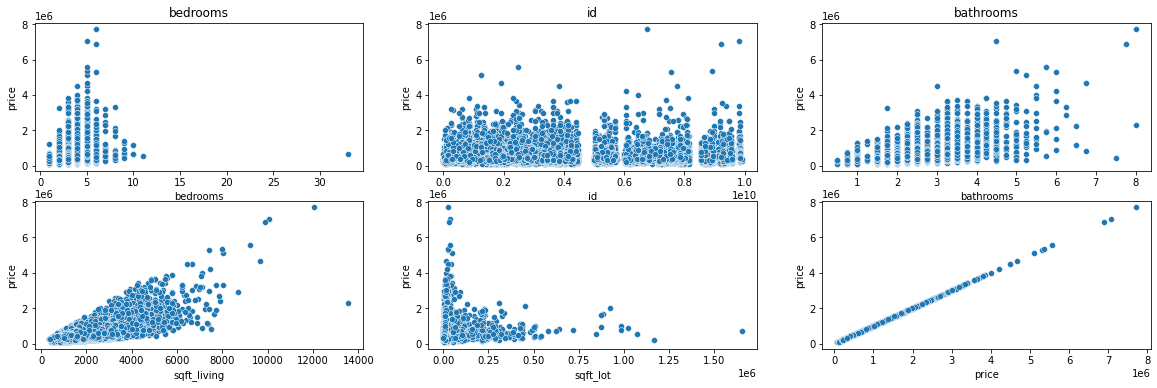

In [12]:
fig, axes = plt.subplots(nrows=2,ncols=3, figsize =(20,6))
sns.scatterplot(data=first6_df, x='bedrooms', y="price", ax=axes[0][0]).set(title='bedrooms')
sns.scatterplot(data=first6_df, x='id', y="price", ax=axes[0][1]).set(title='id')
sns.scatterplot(data=first6_df, x='bathrooms', y="price", ax=axes[0][2]).set(title='bathrooms')
sns.scatterplot(data=first6_df, x='sqft_living', y="price", ax=axes[1][0])#.set(title='sqft_living')
sns.scatterplot(data=first6_df, x='sqft_lot', y="price", ax=axes[1][1])#.set(title='sqft_lot') 
sns.scatterplot(data=first6_df, x='price', y="price", ax=axes[1][2])#.set(title='price');

outliers to potentially drop

In [13]:
first6_df.loc[first6_df['sqft_living'] > 11000] #keep

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot
7245,6762700020,10/13/2014,7700000.0,6,8.0,12050,27600
12764,1225069038,5/5/2014,2280000.0,7,8.0,13540,307752


In [14]:
first6_df.loc[first6_df['sqft_lot'] > 1000000] #keep

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot
1717,1020069017,3/27/2015,700000.0,4,1.00,1300,1651359
7640,2623069031,5/21/2014,542500.0,5,3.25,3010,1074218
7762,2323089009,1/19/2015,855000.0,4,3.50,4030,1024068
17305,3326079016,5/4/2015,190000.0,2,1.00,710,1164794


In [15]:
first6_df.loc[first6_df['bedrooms'] > 20] #drop

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000


Dropping the bedroom outlier in the main df

In [16]:
df.drop(15856, inplace=True)

In [17]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159600e+04,2.159600e+04,21596.000000,21596.000000,21596.000000,2.159600e+04,21596.000000,19220.000000,21533.000000,21596.000000,21596.000000,21596.000000,21596.000000,17754.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,4.580575e+09,5.402920e+05,3.371828,2.115843,2080.343165,1.509983e+04,1.494119,0.007596,0.233874,3.409752,7.657946,1788.631506,1971.000787,83.641489,98077.950685,47.560087,-122.213977,1986.650722,12758.656649
std,2.876764e+09,3.673760e+05,0.904114,0.768998,918.122038,4.141355e+04,0.539685,0.086827,0.765702,0.650471,1.173218,827.763251,29.375460,399.957185,53.514040,0.138552,0.140725,685.231768,27275.018316
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308950e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [18]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


drop the duplicate houses that have been sold multiple times. Take the averages

In [19]:
df.drop_duplicates(subset='id', keep='last' , inplace=True)

In [20]:
df.loc[df['id'] == 6021501535]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,12/23/2014,700000.0,3,1.5,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.687,-122.386,1570,4500


In [21]:
model_1_df = df.copy()

X , y = model_1_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']], model_1_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)

In [22]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

train_preds = model1.predict(X_train)
test_preds = model1.predict(X_test)

model1.score(X,y)

0.5089774328985504

In [23]:
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [24]:
df['year'] = df['date'].map(lambda x: int(x.split('/')[2]))

In [25]:
df['month'] = df['date'].map(lambda x: x.split('/')[0])

In [26]:
def seasons(month):
    if month == '12' or month == '1' or month == '2':
        return 'winter'
    elif month == '3' or month == '4' or month =='5':
        return 'spring'
    elif month == '6' or month == '7' or month =='8':
        return 'summer'
    else:
        return 'fall'


In [27]:
df['season'] = df['month'].apply(seasons)


In [28]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,season
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,10,fall
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,12,winter
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,NaN,98028,47.7379,-122.233,2720,8062,2015,2,winter
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,12,winter
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,2,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,2009,0.0,98103,47.6993,-122.346,1530,1509,2014,5,spring
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,2014,0.0,98146,47.5107,-122.362,1830,7200,2015,2,winter
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,2009,0.0,98144,47.5944,-122.299,1020,2007,2014,6,summer
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,2004,0.0,98027,47.5345,-122.069,1410,1287,2015,1,winter


In [29]:
df.drop(columns=['date', 'id', 'month'], inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21419 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21419 non-null  float64
 1   bedrooms       21419 non-null  int64  
 2   bathrooms      21419 non-null  float64
 3   sqft_living    21419 non-null  int64  
 4   sqft_lot       21419 non-null  int64  
 5   floors         21419 non-null  float64
 6   waterfront     19066 non-null  float64
 7   view           21356 non-null  float64
 8   condition      21419 non-null  int64  
 9   grade          21419 non-null  int64  
 10  sqft_above     21419 non-null  int64  
 11  sqft_basement  21419 non-null  object 
 12  yr_built       21419 non-null  int64  
 13  yr_renovated   17606 non-null  float64
 14  zipcode        21419 non-null  int64  
 15  lat            21419 non-null  float64
 16  long           21419 non-null  float64
 17  sqft_living15  21419 non-null  int64  
 18  sqft_l

One hot encoding seasons column

In [32]:
ohe = OneHotEncoder(sparse=False)
ohe.fit(df[['season']])
ohe_seasons = pd.DataFrame(ohe.transform(df[['season']]), columns=ohe.get_feature_names())
df2 = pd.concat([df.drop('season', axis=1), ohe_seasons], axis=1)

In [33]:
df2

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,year,x0_fall,x0_spring,x0_summer,x0_winter
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3.0,7.0,...,98178.0,47.5112,-122.257,1340.0,5650.0,2014.0,1.0,0.0,0.0,0.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,...,98125.0,47.7210,-122.319,1690.0,7639.0,2014.0,0.0,0.0,0.0,1.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,...,98028.0,47.7379,-122.233,2720.0,8062.0,2015.0,0.0,0.0,0.0,1.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,...,98136.0,47.5208,-122.393,1360.0,5000.0,2014.0,0.0,0.0,0.0,1.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,...,98074.0,47.6168,-122.045,1800.0,7503.0,2015.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3.0,8.0,...,98103.0,47.6993,-122.346,1530.0,1509.0,2014.0,NaN,NaN,NaN,NaN
21593,400000.0,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3.0,8.0,...,98146.0,47.5107,-122.362,1830.0,7200.0,2015.0,NaN,NaN,NaN,NaN
21594,402101.0,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3.0,7.0,...,98144.0,47.5944,-122.299,1020.0,2007.0,2014.0,NaN,NaN,NaN,NaN
21595,400000.0,3.0,2.50,1600.0,2388.0,2.0,NaN,0.0,3.0,8.0,...,98027.0,47.5345,-122.069,1410.0,1287.0,2015.0,NaN,NaN,NaN,NaN


In [ ]:
df2.info()

Grade 7,8,9    log transform the target

In [ ]:
mid_grades = df.loc[(df['grade'] == 7) | (df['grade'] == 8) | (df['grade'] == 9)]